In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

LGEIL 별 is_converted 비율: 7.13%, 전체 갯수: 16908, is_converted된 갯수: 1206
LGESP 별 is_converted 비율: 7.21%, 전체 갯수: 9311, is_converted된 갯수: 671
LGEUS 별 is_converted 비율: 16.10%, 전체 갯수: 5955, is_converted된 갯수: 959
LGEMS 별 is_converted 비율: 5.60%, 전체 갯수: 2768, is_converted된 갯수: 155
LGEPH 별 is_converted 비율: 8.94%, 전체 갯수: 2651, is_converted된 갯수: 237
LGEGF 별 is_converted 비율: 12.47%, 전체 갯수: 2149, is_converted된 갯수: 268
LGECB 별 is_converted 비율: 3.56%, 전체 갯수: 2079, is_converted된 갯수: 74
LGEUK 별 is_converted 비율: 1.51%, 전체 갯수: 1651, is_converted된 갯수: 25
LGESJ 별 is_converted 비율: 7.90%, 전체 갯수: 1469, is_converted된 갯수: 116
LGECL 별 is_converted 비율: 7.17%, 전체 갯수: 1339, is_converted된 갯수: 96
LGEPS 별 is_converted 비율: 7.35%, 전체 갯수: 1252, is_converted된 갯수: 92
LGEIS 별 is_converted 비율: 0.79%, 전체 갯수: 1146, is_converted된 갯수: 9
LGEPR 별 is_converted 비율: 3.89%, 전체 갯수: 1131, is_converted된 갯수: 44
LGEDG 별 is_converted 비율: 4.95%, 전체 갯수: 1051, is_converted된 갯수: 52
LGEPL 별 is_converted 비율: 7.06%, 전체 갯수: 850, is_converted된 갯수: 60
L

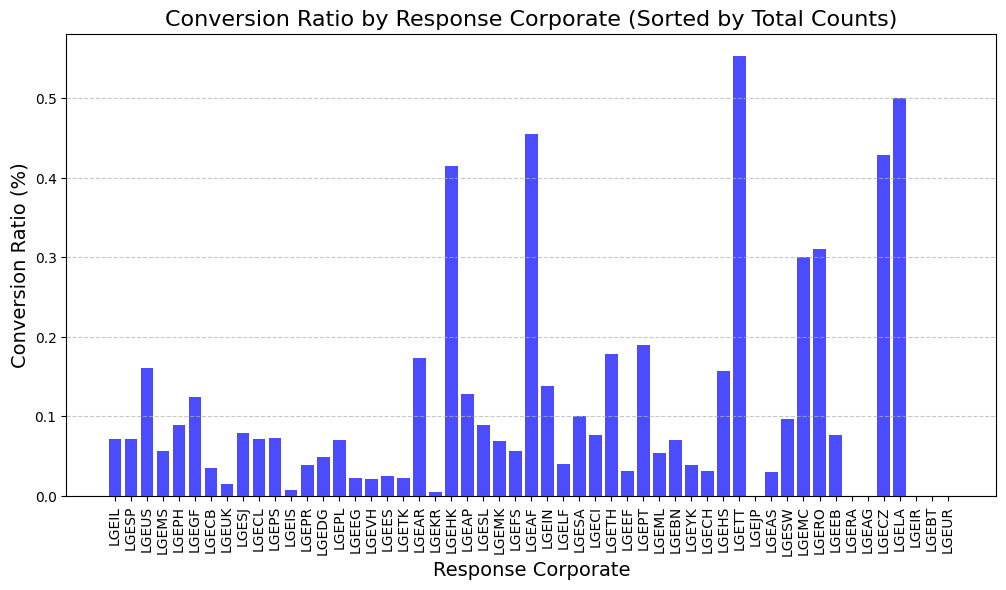

In [42]:
df_response_corporate = df.dropna(subset=['response_corporate'])

converted_counts_response_corporate = df_response_corporate.groupby('response_corporate')['is_converted'].sum().reset_index()
total_counts_response_corporate = df_response_corporate.groupby('response_corporate')['is_converted'].count().reset_index()

ratio_df_response_corporate = pd.merge(converted_counts_response_corporate, total_counts_response_corporate, on='response_corporate', how='left')
ratio_df_response_corporate['conversion_ratio'] = ratio_df_response_corporate['is_converted_x'] / ratio_df_response_corporate['is_converted_y']

# Sorting by total counts in descending order
sorted_response_corporate = ratio_df_response_corporate.sort_values(by='is_converted_y', ascending=False)

# Print information
for index, row in sorted_response_corporate.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['response_corporate']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(sorted_response_corporate['response_corporate'], sorted_response_corporate['conversion_ratio'], color='blue', alpha=0.7)
plt.title('Conversion Ratio by Response Corporate (Sorted by Total Counts)', fontsize=16)
plt.xlabel('Response Corporate', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
